In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Loading / Preprocessing

In [2]:
dataset=pd.read_csv('housing.csv',na_values= "")
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
dataset.shape

(20640, 10)

# Find and drop the missing values in the data frame

In [4]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
dataset.dropna(inplace=True)

In [6]:
dataset.shape

(20433, 10)

4.	Create a data frame ‘corr_df’ by dropping the columns latitude, longitude, and ocean_proximity using the pandas.DataFrame.drop() function. Use the Pearson correlation to find the correlation of each remaining feature in the ‘corr_df’ with the target variable ‘median_house_value’ using the function pandas.DataFrame.corrwith(). 

In [7]:
dataset.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
corr_df = dataset.drop(['latitude', 'longitude', 'ocean_proximity'], axis=1)

In [9]:
corr_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [10]:
corr_df.corrwith(corr_df['median_house_value'], axis=0)

housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
dtype: float64

5. Create a data frame X of features (by dropping the column ‘median_house_value’’ from the original data frame) using the pandas.DataFrame.drop() function. Create a Series object of targets Y (by only considering the ‘median_house_value’ column from the original data frame (Do NOT use the ‘corr_df’ data frame in this step. Use the data frame which was obtained as a result of step b.i.3 above).

In [11]:
X = dataset.drop(['median_house_value'], axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [12]:
Y = dataset['median_house_value']
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

# ii.	Data Visualization

1.	Use pandas.DataFrame.hist(bins = 50) function for visualizing the variation on the columns housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value. Plot each histogram as a separate subplot.

2.	Use pandas.dataframe.describe() function to find the mean, median and standard deviations for each feature and report in the jupyter notebook.

3.	Use pandas.get_dummies to convert categorical variables into dummy /one-hot encoding. In this case the categorical column is ocean_proximity


[None, None, None, None, None, None, None, None, None]

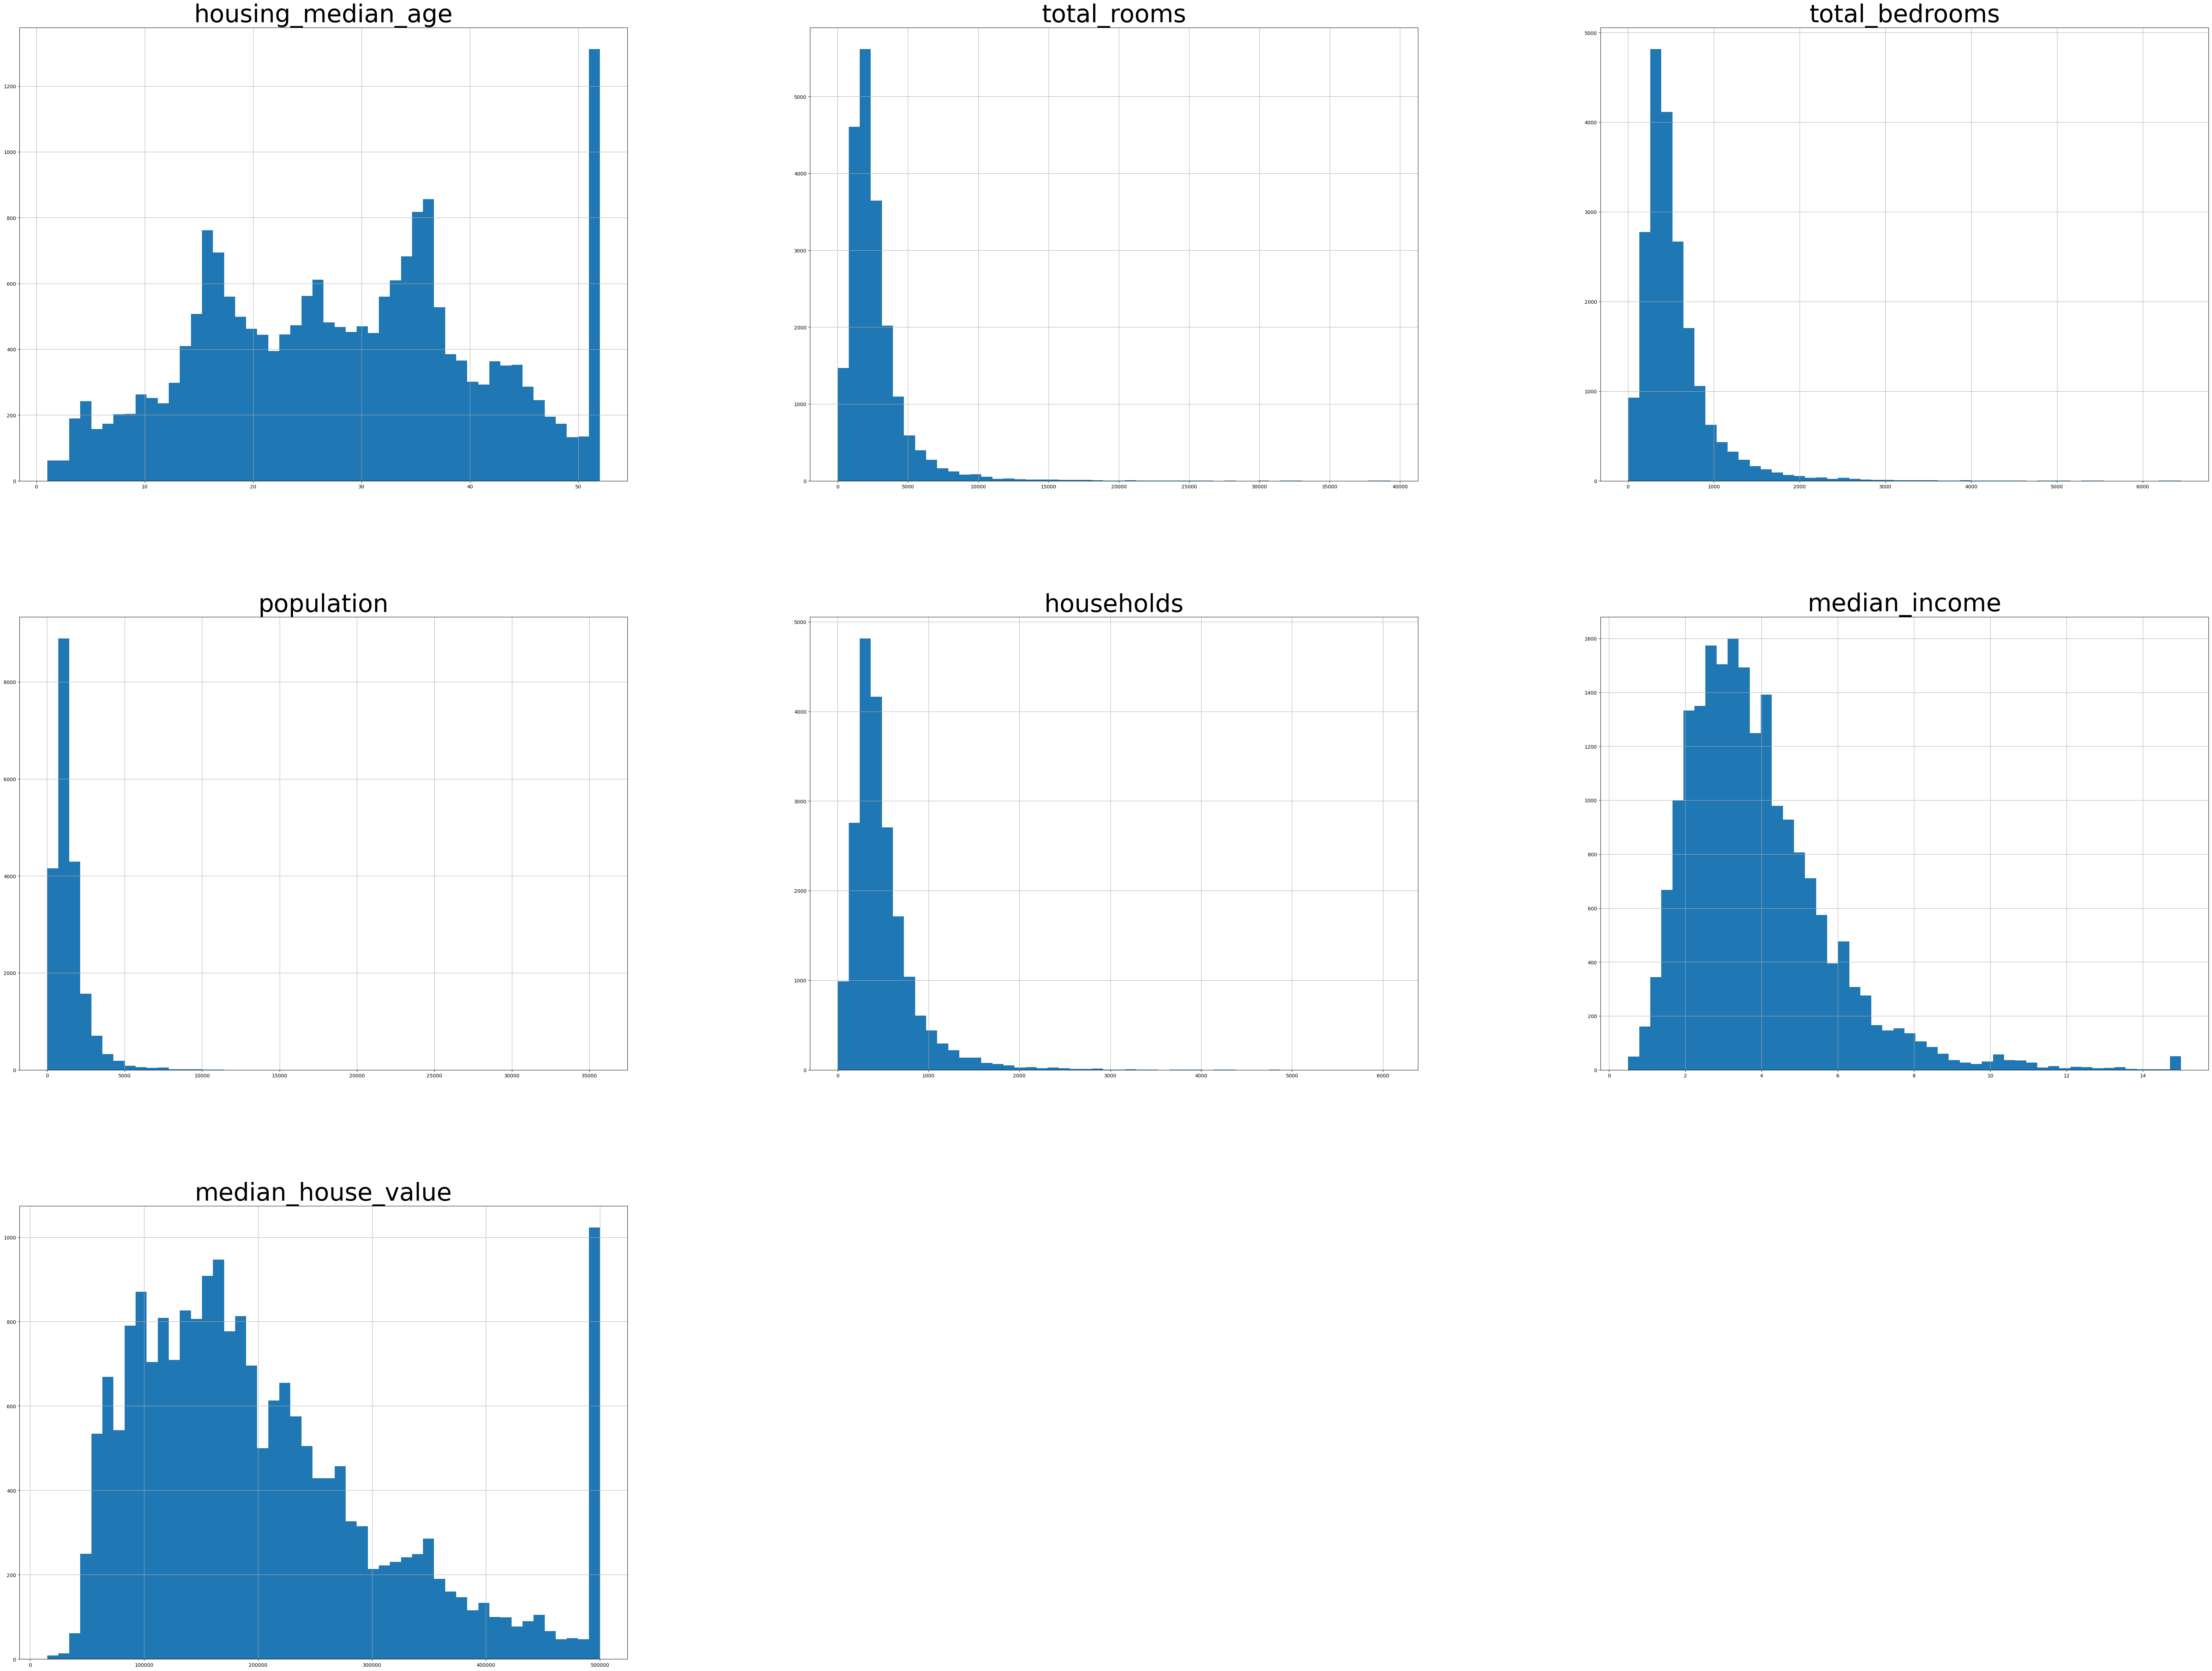

In [13]:
fig = corr_df.hist(bins = 50, figsize=(80, 60)) 
[x.title.set_size(50) for x in fig.ravel()] 

In [14]:
dataset.describe(include='all') 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9034
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,NaN
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,NaN
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,NaN


In [15]:
dummy = pd.get_dummies(dataset['ocean_proximity'])
dummy

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [16]:
dataset=dataset.join(dummy)
dataset.drop(['ocean_proximity'], axis=1, inplace=True)
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


# iii.	Data Splitting:

In [17]:
X = dataset.drop(['median_house_value'], axis=1)
y= dataset['median_house_value']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)    # Use 30% test 70% training data. 

# iv. Data Scaling:

iv.	Data Scaling: (3 points)
1.	Use the StandardScaler() to instantiate the standard scaler class. Note: You will need two separate scaler objects, one to scale the features, another to scale the target values.

2.	For each scaler, employ the `fit_transform()’ function (only on the training  features, training targets) of the scaler to retrieve the new (scaled) version of the data. Store them in X_train, and y_train again.

3.	Scale the X_test and y_test as well and store the scaled values back in X_test and y_test. (i.e., use the appropriate “fitted” scaler above to “transform” the test data. Note: the function to be employed in this case is `transform()` as opposed to `fit_transform()`). 
Henceforth, X_train, y_train, X_test, y_test will refer to the scaled data unless stated otherwise.

4.	Use pandas.DataFrame.hist(bins = 50) function for visualizing the variation of numerical attributes housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value for the X_train and y_train dataset (similar to step b.ii.1 above). Once again, plot each histogram as a separate subplot.


In [19]:
from sklearn import preprocessing 
scaler_X = preprocessing.StandardScaler()
scaler_y = preprocessing.StandardScaler()

In [20]:
X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1,1))

In [21]:
X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test.values.reshape(-1,1))

In [22]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (14303, 13)
X_test Shape  :  (6130, 13)
y_train Shape :  (14303, 1)
y_test Shape  :  (6130, 1)


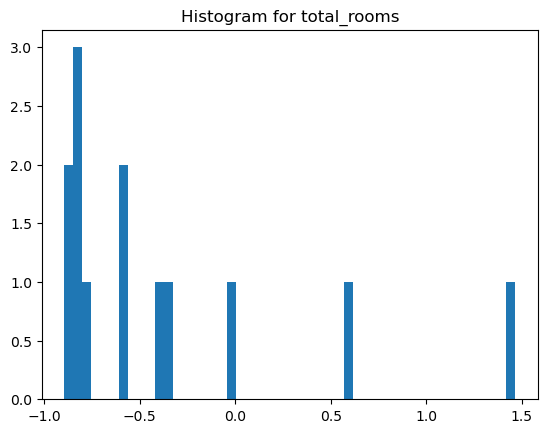

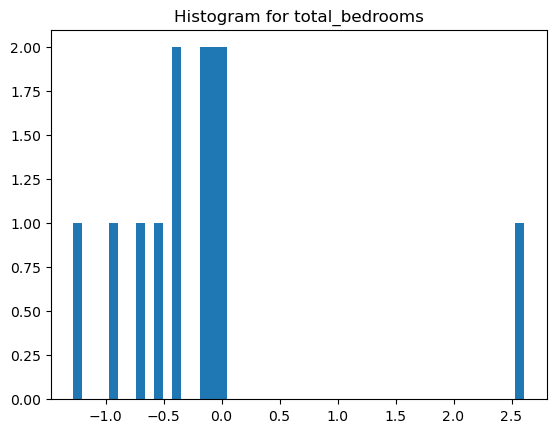

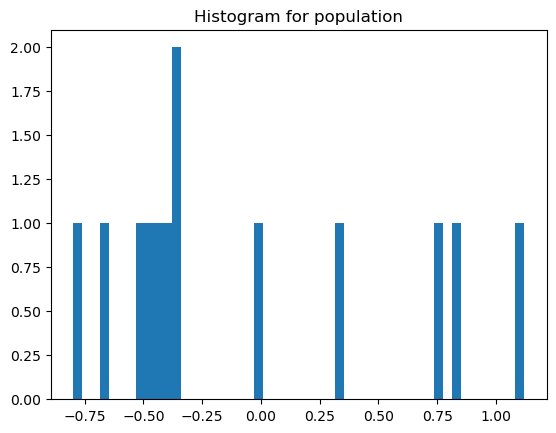

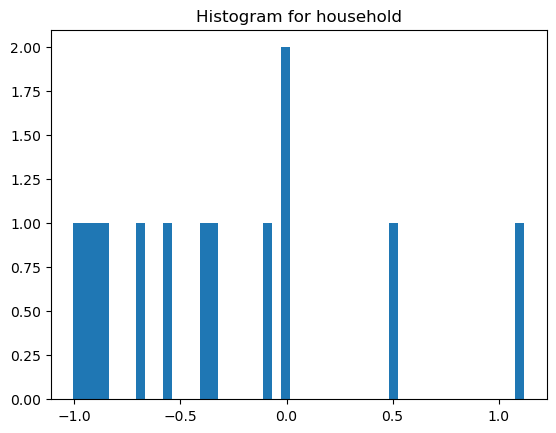

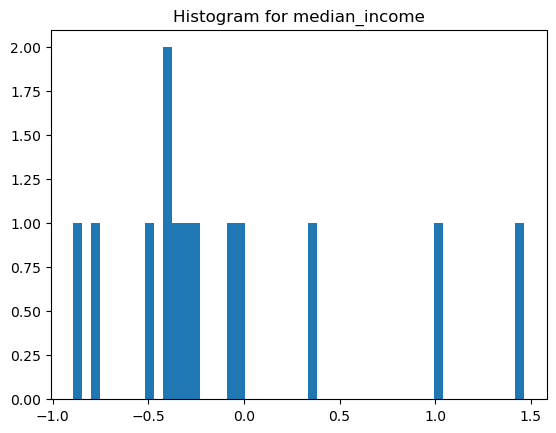

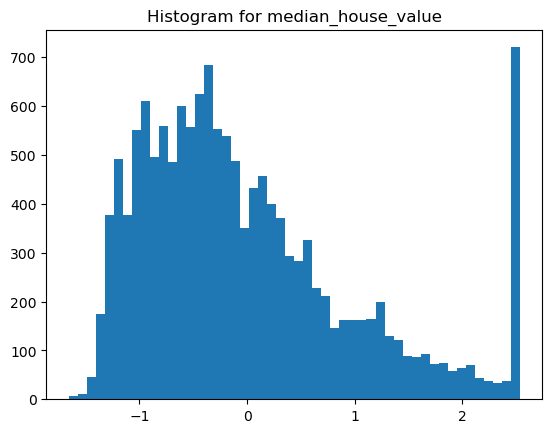

In [23]:
col = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'household', 'median_income']
for feature in range(2,7):
    plt.hist(X_train[feature], bins=50)
    plt.title('Histogram for {}'.format(col[feature-1]))
    plt.show()
    
plt.hist(y_train, bins=50)
plt.title('Histogram for median_house_value')
plt.show()


# c. Modelling


i.	Employ Linear Regression from sklearn.linear_model, and instantiate the model.

ii.	(3 points) Once instantiated, `fit()` the model using the scaled X_train, y_train data. 

iii.	(2 points) Employ the `predict()` function to obtain predictions on X_test. Store the predictions in a variable named `y_preds`. Note: Since the model has been trained on scaled data (i.e., both features and targets, the predictions will also be in the “scaled” space. We need to transform the predictions back to the original space).

iv.	(2 points) Use inverse_transform() function to convert the normaized data (`y_preds` ) to original scale. Store the transformed values back into `y_preds`.


In [24]:
from sklearn.linear_model import LinearRegression
LG = LinearRegression().fit(X_train, y_train)

In [25]:
#Predicting Test Data
y_preds= LG.predict(X_test)
y_preds

array([[-0.71006486],
       [ 0.73428244],
       [ 0.66312764],
       ...,
       [-0.68150184],
       [ 0.83689621],
       [-0.77776376]])

In [26]:
y_preds=scaler_y.inverse_transform(y_preds)
y_preds

array([[124450.88349549],
       [291703.5411387 ],
       [283463.95111083],
       ...,
       [127758.4272728 ],
       [303586.01925824],
       [116611.48073614]])

v.	(3 points) Perform PCA on the features (X_train) and set n_component as 2.
1.	Show a scatter plot where on the x-axis we plot the first PCA component and second component on the y-axis. 

2.	Calculate the total percentage of variance captured by the 2 PCA components using pca.explained_variance_ratio_. Also, report the strength of each PCA component using pca.singular_values_

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

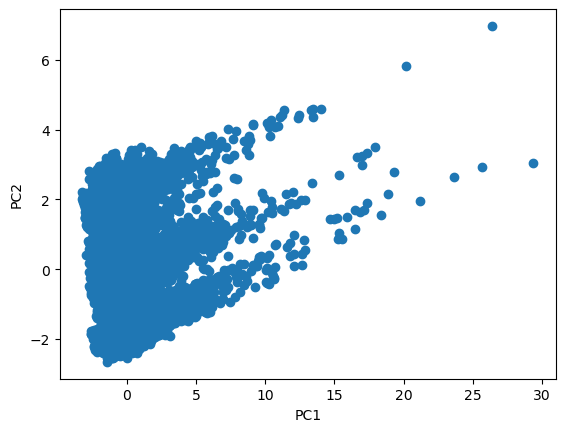

In [29]:
#visulaized PCA
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [30]:
print(pca.explained_variance_ratio_)

[0.30287935 0.19622484]


In [31]:
total_ratio = 0.30146418 + 0.19733311
print(total_ratio)

0.49879729000000006


In [32]:
#strength of each of the 2 principal components

print (pca.singular_values_)

[237.31220707 191.01269777]


# d.	Evaluation: (6 points)


i.	(2 points) Plot a scatter plot using matplotlib.pyplot.scatter function. Plot the predicted median house values on the y-axis vs the actual median house values on the x-axis.

ii.	(4 points) Calculate MAPE, RMSE  and R2 for the model and report them in the following table. 
Hint for RMSE set the squared parameter to False.
		


In [33]:
from matplotlib.pyplot import scatter

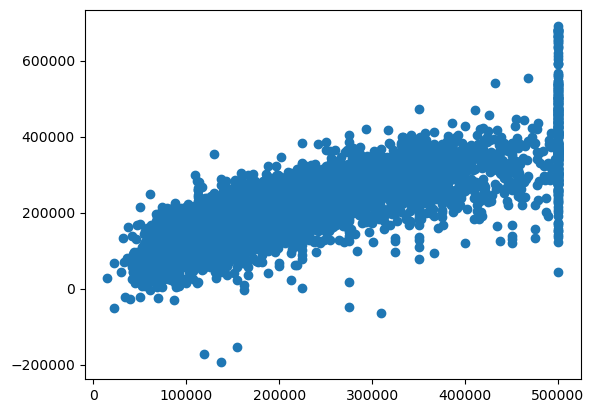

In [34]:
plt.scatter(scaler_y.inverse_transform(y_test), y_preds)
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
mean_absolute_percentage_error(scaler_y.inverse_transform(y_test), y_preds)

0.2812265772389542

In [37]:
from math import sqrt
sqrt(mean_squared_error(scaler_y.inverse_transform(y_test), y_preds))

68000.24174403705

In [38]:
r2_score(scaler_y.inverse_transform(y_test), y_preds)

0.6477571942762308

# Discussion:


i.	(2 points) Based on the weights of the linear regression model, rank the features (note: only continuous features) in decreasing order of influence on the predictions. 

ii.	(2 points) Discuss how the influence of the features (obtained in question e.1) relates 
to the pair-wise correlation results calculated above i.e., are the features that are highly correlated with the output also the most influential or is there some other phenomenon being observed?

iii.	(2 points) Comment about the MAPE, RMSE, R2 results. What can we learn from each of these results about the model prediction performance?

iv.	(2 points) Why is centering and scaling the data important before performing PCA?


In [39]:
weights = LG.coef_
weights

array([[-0.48673505, -0.4881453 ,  0.11704217, -0.11945455,  0.35924993,
        -0.37428037,  0.17507117,  0.64253534,  0.05204866, -0.10625093,
         0.02665153,  0.02052688,  0.04993031]])

In [40]:
weights.sort()
weights

array([[-0.4881453 , -0.48673505, -0.37428037, -0.11945455, -0.10625093,
         0.02052688,  0.02665153,  0.04993031,  0.05204866,  0.11704217,
         0.17507117,  0.35924993,  0.64253534]])

In [42]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [43]:
importance_map = dict(zip(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], [-0.48673505, -0.4881453 ,  0.11704217, -0.11945455,  0.35924993,
        -0.37428037,  0.17507117,  0.64253534,  0.05204866, -0.10625093,
         0.02665153,  0.02052688,  0.04993031]))


In [45]:
sorted_importance = sorted(importance_map.items(), key=lambda x: abs(x[1]))
sorted_importance

[('NEAR BAY', 0.02052688),
 ('ISLAND', 0.02665153),
 ('NEAR OCEAN', 0.04993031),
 ('<1H OCEAN', 0.05204866),
 ('INLAND', -0.10625093),
 ('housing_median_age', 0.11704217),
 ('total_rooms', -0.11945455),
 ('households', 0.17507117),
 ('total_bedrooms', 0.35924993),
 ('population', -0.37428037),
 ('longitude', -0.48673505),
 ('latitude', -0.4881453),
 ('median_income', 0.64253534)]

# Answer of e

Rank(decreasing order): 
median_income, latitude, longitude, population, total_bedrooms, households, total_rooms, housing_median_age

ii.The features with higher weights have more influence on output and lower weights feature have less influence.

iii.
They all quantifies how well a linear regression model fits a dataset. MAPE shows the error values in percentages. The RMSE tells how well a regression model can predict the value of a response variable in absolute terms while R Squared tells how well the predictor variables can explain the variation in the response variable.

iv. They are important since the variables may have different units or scales. Normalization ensure all features are at the same scale.